# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [3]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline 

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [5]:
df = pd.read_csv('sentencing_asof0405.csv')

/var/folders/dz/qjs_l1m15gqcnlxw27n5klkc0000gn/T/ipykernel_67816/977872858.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sentencing_asof0405.csv')


## 0.2: Print head, dimensions, info (0 points)

In [7]:
df.head()
df.shape
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [10]:
cols = ["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]

# Print the number of unique values for the following columns
for c in cols:
    print(len(df[c].value_counts()))

df[cols].agg(lambda x: len(np.unique(x)))

197519
211977
229015


CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

### Why there are more unique people than unique cases?

There are more unique people than unique cases because each case can involve multiple people, and the number of people per case is greater than one.

### Why there are more unique charges than unique people?

There are more unique charges than unique people because each person can face multiple charges, and the number of charges per person is greater than one.

In [12]:
# Case involving multiple people, example 
print(df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().sort_values(ascending=False).head(1))
df[df["CASE_ID"] == 388821827872]

CASE_ID
388821827872    17
Name: CASE_PARTICIPANT_ID, dtype: int64


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
51240,388821827872,728547953866,10/27/2011 12:00:00 AM,Narcotics,False,351084750661,653015724556,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,23,5/16/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,NaN,NaN,NaN,NaN,Narcotics
51241,388821827872,728548048239,10/27/2011 12:00:00 AM,Narcotics,False,351085102592,653016378500,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,30,7/16/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 8:45:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51242,388821827872,728548142611,10/27/2011 12:00:00 AM,Narcotics,True,351079823635,653006569340,CRIMINAL DRUG CONSPIRACY,1,7/1/2014 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 7:15:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51243,388821827872,728548236983,10/27/2011 12:00:00 AM,Narcotics,False,351083141837,653012735097,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,12,7/24/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 9:59:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51244,388821827872,728548331355,10/27/2011 12:00:00 AM,Narcotics,False,351081784391,653010212742,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,9,5/10/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 4:35:00 PM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51245,388821827872,728548425728,10/27/2011 12:00:00 AM,Narcotics,False,351083141837,653012735097,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,12,1/9/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 9:55:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51246,388821827872,728548425728,10/27/2011 12:00:00 AM,Narcotics,False,351084298179,653014883770,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,17,1/9/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 9:55:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51247,388821827872,728548425728,10/27/2011 12:00:00 AM,Narcotics,True,351079823635,679297078014,CRIMINAL DRUG CONSPIRACY,1,1/9/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 9:55:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51248,388821827872,728548520100,10/27/2011 12:00:00 AM,Narcotics,True,351079823635,653006569340,CRIMINAL DRUG CONSPIRACY,1,1/21/2015 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,NaN,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51249,388821827872,728548614472,10/27/2011 12:00:00 AM,Narcotics,False,351085404246,653016939023,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,35,8/14/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 2:30:00 PM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics


In [13]:
# Person facing multiple charges, example
print(df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique().sort_values(ascending=False).head(1))
df[df["CASE_PARTICIPANT_ID"] == 179640159105]

CASE_PARTICIPANT_ID
179640159105    99
Name: CHARGE_ID, dtype: int64


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
266,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240855975,346314890356,MURDER/OTHER FORCIBLE FELONY,2,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
267,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240906251,346314329833,MURDER/OTHER FORCIBLE FELONY,3,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
268,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240956527,346312741683,MURDER/OTHER FORCIBLE FELONY,4,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
269,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69241006802,346312835104,MURDER/OTHER FORCIBLE FELONY,5,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
270,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69241057078,346312928524,MURDER/OTHER FORCIBLE FELONY,6,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390175033,145107173331,AGG KIDNAPING ARMED W/FIREARM,94,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
361,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390225309,145106893070,AGG KIDNAPING ARMED W/FIREARM,95,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
362,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390275585,145107453593,AGG KIDNAPING ARMED W/FIREARM,96,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
363,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69390325860,145107547014,AGG KIDNAPING ARMED W/FIREARM,97,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion


In [14]:
# Print the mean and median number of charges per case/participant

df.groupby(["CASE_ID", "CASE_PARTICIPANT_ID"])["CHARGE_ID"].agg("count").mean()
df.groupby(["CASE_ID", "CASE_PARTICIPANT_ID"])["CHARGE_ID"].agg("count").median()

# Print the mean and median number of participants per case

df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].agg("count").mean()
df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].agg("count").median()

1.1706270019860645

1.0

1.2563145823946051

1.0

### Does the data seem to enable us to follow the same defendant across different cases they're charged in? 

The data does not allow us to follow the same defendant across multiple charges because it is a case participant id, not a participant/user id. The case participant id is unique to the person per the case and the same person in different cases would have a different case participant id.

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


### Summary of differences between OFFENSE_CATEGORY and UPDATED_OFFENSE_CATEGORY

The updated offense category shows the actual offense based on the charges as the case unfolds. The offense_category is the initial 
interpretation of the offense. 

### Print one example of a changed offense from one of these categories and comment on why

As printed, this example is Home Invasion to UUW - Unlawful Use of Weapon. One possible reason why is because new information was found regarding the use of a weapon in the case, and home invasion was no longer determined to be the primary motive or charge, as cases and offenses evolve with new evidence.

In [18]:
# Construct an indicator is_changed_offense
df["is_changed_offense"] = df["OFFENSE_CATEGORY"] != df["UPDATED_OFFENSE_CATEGORY"]
# where OFFENSE_CATEGORY is the broad offense category before specific charges are filed on a case
# and UPDATED_OFFENSE_CATEGORY is the offense category for the case updated based upon the primary charge, since cases evolve.

# more common changed offenses
print(df[df["is_changed_offense"]]["OFFENSE_CATEGORY"].value_counts())
print(df[df["is_changed_offense"]][["CASE_ID", "OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY"]].tail(1))

OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
                                ... 
Perjury                            4
Prostitution                       3
Compelling Gang Membership         2
Benefit Recipient Fraud            2
Violate Bail Bond                  2
Name: count, Length: 88, dtype: int64
             CASE_ID OFFENSE_CATEGORY      UPDATED_OFFENSE_CATEGORY
248141  445516248775    Home Invasion  UUW - Unlawful Use of Weapon


## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [20]:
# check if value counts is correct 

# create a new field, simplified_offense_derived
def simplify(crime):
    replace = {
        "Arson" : "Arson",
        "Homicide" : "Homicide",
        "Vehicle" : "Vehicle-related",
        "Vehicular" : "Vehicle-related",
        "Battery" : "Battery"
    }
    for key in replace.keys():
        if key in crime:
            return replace[key] # dictionary 
    return crime

df["simplified_offense_derived"] = df["UPDATED_OFFENSE_CATEGORY"].str.replace("Aggravated ", "")
df["simplified_offense_derived"] = df["simplified_offense_derived"].apply(simplify)

# Print the difference between the # of unique offenses 
print(len(df["UPDATED_OFFENSE_CATEGORY"].value_counts()))
print(len(df["simplified_offense_derived"].value_counts()))
print("Difference: ",len(df["UPDATED_OFFENSE_CATEGORY"].value_counts()) - len(df["simplified_offense_derived"].value_counts()))

79
65
Difference:  14


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [22]:
### Race

df["is_black_derived"] = df["RACE"].str.contains("Black")
df["is_hisp_derived"] = df["RACE"].apply(lambda s: (s == "White [Hispanic or Latino]") or (s == "HISPANIC"))
df["is_white_derived"] = df["RACE"].apply(lambda s: s == "White")
df["is_otherth_derived"] = ~df["is_black_derived"].dropna() & ~df["is_hisp_derived"] & ~df["is_white_derived"] 

### Gender

df["is_male_derived"] = df["GENDER"].apply(lambda s: (s == "Male") or (s == "Male name, no gender given"))

### Age

max_age = df["AGE_AT_INCIDENT"].quantile([0.9999])[0.9999]
df["age_derived"] = df["AGE_AT_INCIDENT"].dropna().apply(lambda x: max_age if x > max_age else x)

### Sentencing

def mistranscribed(s):
    year = s[-4:]
    if year[:-1] == "291" or year[:-1] == "221":
        return s[:-4] + "2021"
    else:
        return s

df["sentenceymd_derived"] = df["SENTENCE_DATE"].str[:-12]
df["sentenceymd_derived"] = df["sentenceymd_derived"].apply(mistranscribed)

df["sentenceymd_derived"] = pd.to_datetime(df["sentenceymd_derived"], format='%m/%d/%Y')
df["sentenceym_derived"] = df["sentenceymd_derived"].apply(lambda d: d.replace(day=1))

### Sentencing judge

def replace_duplicates(s):
    duplicates = {
        "Douglas J Simpson": "Doug  Simpson",
        "Shelley  Sutker-Dermer": "Shelley  Sutker",
    }
    if s in duplicates.keys():
        return duplicates[s]
    else:
        return s

# :-1 removes na
judges = list(df.SENTENCE_JUDGE.sort_values().unique())[:-1]
judge_ids = {}
for i, n in enumerate(judges):
    judge_ids[n] = "judge_" + str(i+1)

df["judgeid_derived"] = df["SENTENCE_JUDGE"].apply(replace_duplicates)
df["judgeid_derived"] = df["judgeid_derived"].dropna().apply(lambda s: judge_ids[s])


base_cols = ["RACE", "GENDER", "AGE_AT_INCIDENT", "UPDATED_OFFENSE_CATEGORY", "SENTENCE_DATE", "SENTENCE_JUDGE"]
derived_cols = [c for c in df.columns if "_derived" in c]

# random sample of 10 rows

df[base_cols + derived_cols].sample(n=10)

,RACE,GENDER,AGE_AT_INCIDENT,UPDATED_OFFENSE_CATEGORY,SENTENCE_DATE,SENTENCE_JUDGE,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_otherth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
67904,White,Male,20.0,UUW - Unlawful Use of Weapon,10/1/2013 12:00:00 AM,Carol A Kipperman,UUW - Unlawful Use of Weapon,False,False,True,False,True,20.0,2013-10-01,2013-10-01,judge_31
103947,Black,Male,23.0,UUW - Unlawful Use of Weapon,5/6/2014 12:00:00 AM,Kenneth J Wadas,UUW - Unlawful Use of Weapon,True,False,False,False,True,23.0,2014-05-06,2014-05-01,judge_165
232095,Black,Male,26.0,Possession of Stolen Motor Vehicle,2/27/2020 12:00:00 AM,Dennis J Porter,Vehicle-related,True,False,False,False,True,26.0,2020-02-27,2020-02-01,judge_61
81677,Black,Male,20.0,Robbery,12/17/2012 12:00:00 AM,Noreen Valeria Love,Robbery,True,False,False,False,True,20.0,2012-12-17,2012-12-01,judge_238
72715,Black,Male,41.0,Armed Robbery,9/17/2012 12:00:00 AM,Vincent M Gaughan,Armed Robbery,True,False,False,False,True,41.0,2012-09-17,2012-09-01,judge_323
147088,Black,Male,18.0,Narcotics,3/4/2016 12:00:00 AM,Raymond Myles,Narcotics,True,False,False,False,True,18.0,2016-03-04,2016-03-01,judge_257
219030,White,Male,41.0,Burglary,10/25/2018 12:00:00 AM,Kerry M Kennedy,Burglary,False,False,True,False,True,41.0,2018-10-25,2018-10-01,judge_168
30551,Black,Male,32.0,Narcotics,1/4/2012 12:00:00 AM,Stanley Sacks,Narcotics,True,False,False,False,True,32.0,2012-01-04,2012-01-01,judge_286
54415,Black,Male,19.0,UUW - Unlawful Use of Weapon,8/9/2012 12:00:00 AM,James B Linn,UUW - Unlawful Use of Weapon,True,False,False,False,True,19.0,2012-08-09,2012-08-01,judge_111
106247,Black,Male,18.0,Narcotics,8/29/2013 12:00:00 AM,Mary Margaret Brosnahan,Narcotics,True,False,False,False,True,18.0,2013-08-29,2013-08-01,judge_207


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [24]:
# Subset to cases where only one participant is charged, so
# number of times each case participant id is present in a case -> filter for 1
ids = df.groupby("CASE_ID")[["CASE_PARTICIPANT_ID"]].nunique().reset_index()
ids = ids[ids["CASE_PARTICIPANT_ID"] == 1]

id_set = set(ids.CASE_ID)

df_subset = df.copy()
df_subset = df_subset[df_subset["CASE_ID"].isin(id_set)]

# participant-level dataset
df_subset = df_subset[(df_subset.PRIMARY_CHARGE_FLAG == True) & (df_subset.CURRENT_SENTENCE_FLAG == True)]
# Double check that this worked by confirming there are no longer multiple charges for the same case-participant, it's indeed 1!
print(df_subset.groupby(["CASE_ID", "CASE_PARTICIPANT_ID"])["CHARGE_ID"].agg("count").min())

# Filter out observations where judge is nan or nonsensical
df_subset = df_subset[
    (~df_subset.SENTENCE_JUDGE.isnull()) |
    (df_subset.SENTENCE_JUDGE != 'FLOOD')
]

# Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)
df_subset = df_subset[
    (df_subset.sentenceymd_derived >= '2012-01-01') &
    (df_subset.sentenceymd_derived <= '2021-04-05')
]
df_subset

# After completing these steps, print the number of rows in the data
print("Number of rows in the data: ", df_subset.shape[0])

1


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_otherth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_41
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_313
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_164
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_334
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,NaN,False,False,False,False,19.0,2021-03-19,2021-03-01,judge_9
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_297
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101


Number of rows in the data:  135593


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [28]:
df2 = pd.read_pickle('sentencing_cleaned.pkl')
df2

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,True,False,False,False,False,19.0,2021-03-19,2021-03-01,judge_8
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_294
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_99
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_99


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

## Mathematical notation

Black proportion = $ \sum \frac{\text{\# of Black Defendants}}{N} $

White proportion = $ \sum \frac{\text{\# of White Defendants}}{N} $

where N = number of unique cases that month

## Trends and what seems to be going on in April and May 2020

There appears to be a sharp decrease in the gap between Black defendants and White defendants as a fraction of the total defendants, but this drop in disparities was likely due to the pandemic and lower arrest rates.


In [31]:
# tabulate the proportion of defendants
df_group = df2.groupby('sentenceym_derived').agg(
    is_black_derived = ('is_black_derived', 'sum'), 
    is_white_derived = ('is_white_derived', 'sum'), 
    CASE_ID = ('CASE_ID', 'nunique')
).reset_index()

df_group['black_defendant_prop'] = df_group.is_black_derived / df_group.CASE_ID
df_group['white_defendant_prop'] = df_group.is_white_derived / df_group.CASE_ID

# Optional challenge
df_group['fewer'] = df_group.CASE_ID < 100

df_group

,sentenceym_derived,is_black_derived,is_white_derived,CASE_ID,black_defendant_prop,white_defendant_prop,fewer
0,2012-01-01,1134,242,1674,0.677419,0.144564,False
1,2012-02-01,941,233,1450,0.648966,0.160690,False
2,2012-03-01,1030,255,1612,0.638958,0.158189,False
3,2012-04-01,1000,211,1436,0.696379,0.146936,False
4,2012-05-01,1074,223,1545,0.695146,0.144337,False
...,...,...,...,...,...,...,...
106,2020-11-01,298,76,491,0.606925,0.154786,False
107,2020-12-01,347,85,537,0.646182,0.158287,False
108,2021-01-01,278,50,447,0.621924,0.111857,False
109,2021-02-01,320,66,491,0.651731,0.134420,False


<Figure size 1100x500 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Proportion')

Text(2016-12-01 00:00:00, 0.5, 'Attorney Foxx took office')

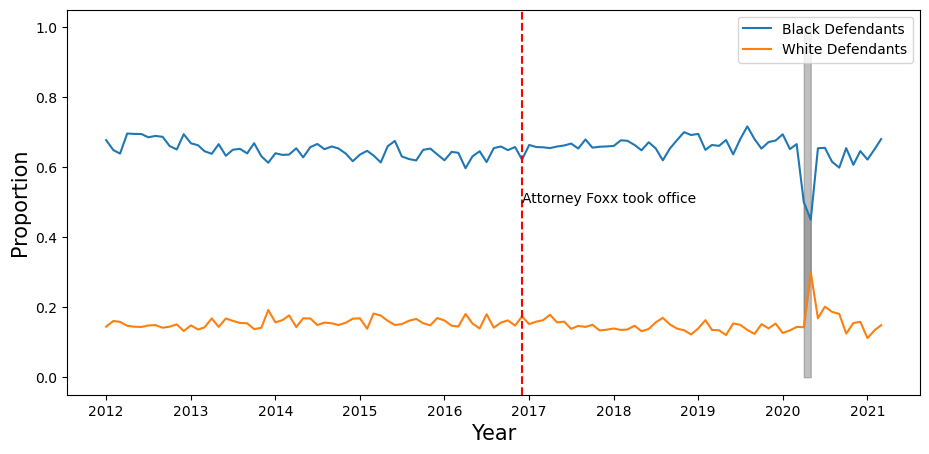

In [32]:
# Now, visualize:

import matplotlib.pyplot as plt

plt.figure(figsize=(11,5))
plt.plot(df_group.sentenceym_derived, df_group.black_defendant_prop, label = 'Black Defendants')
plt.plot(df_group.sentenceym_derived, df_group.white_defendant_prop, label = 'White Defendants')
plt.legend()
plt.xlabel("Year", fontsize=15)
plt.ylabel("Proportion", fontsize=15)

# optional line 
plt.axvline(x = pd.to_datetime('2016-12-01'), color='red', linestyle='--')
plt.annotate('Attorney Foxx took office', xy=(pd.to_datetime('2016-12-01'), 0.5))

# optional shade 
plt.fill_between(df_group.sentenceym_derived, df_group.black_defendant_prop, 0, where=df_group.fewer, color='gray', alpha=0.5)
plt.fill_between(df_group.sentenceym_derived, df_group.white_defendant_prop, 1, where=df_group.fewer, color='gray', alpha=0.5)

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [34]:
df2["is_black_incarc"] = df2.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"]) & df.is_black_derived
df2["is_white_incarc"] = df2.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"]) & df.is_white_derived

df_incarc = df2.groupby('sentenceym_derived').agg(
    is_black_incarc = ('is_black_incarc', 'sum'), 
    is_white_incarc = ('is_white_incarc', 'sum'), 
    is_black_derived = ('is_black_derived', 'sum'), 
    is_white_derived = ('is_white_derived', 'sum'),
    CASE_ID = ('CASE_ID', 'nunique')
).reset_index()

# Percent of black defendants who are incarcerated out of all black defendants that month/year
df_incarc["prop_black_incar"] = df_incarc.is_black_incarc / df_incarc.is_black_derived
# Percent of white defendants who are incarcerated out of all white defendants that month/year
df_incarc["prop_white_incar"] = df_incarc.is_white_incarc / df_incarc.is_white_derived
# Gaps as racial_difference
df_incarc['racial_difference'] = df_incarc.prop_black_incar - df_incarc.prop_white_incar

df_incarc


,sentenceym_derived,is_black_incarc,is_white_incarc,is_black_derived,is_white_derived,CASE_ID,prop_black_incar,prop_white_incar,racial_difference
0,2012-01-01,671,87,1134,242,1674,0.591711,0.359504,0.232207
1,2012-02-01,565,87,941,233,1450,0.600425,0.373391,0.227035
2,2012-03-01,598,113,1030,255,1612,0.580583,0.443137,0.137445
3,2012-04-01,598,94,1000,211,1436,0.598000,0.445498,0.152502
4,2012-05-01,577,73,1074,223,1545,0.537244,0.327354,0.209890
...,...,...,...,...,...,...,...,...,...
106,2020-11-01,122,23,298,76,491,0.409396,0.302632,0.106764
107,2020-12-01,170,32,347,85,537,0.489914,0.376471,0.113443
108,2021-01-01,138,22,278,50,447,0.496403,0.440000,0.056403
109,2021-02-01,135,13,320,66,491,0.421875,0.196970,0.224905


<Figure size 1100x500 with 0 Axes>

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_otherth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,NaN,False,False,False,False,19.0,2021-03-19,2021-03-01,judge_9
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_297
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Diff b/t Black and White Incarc')

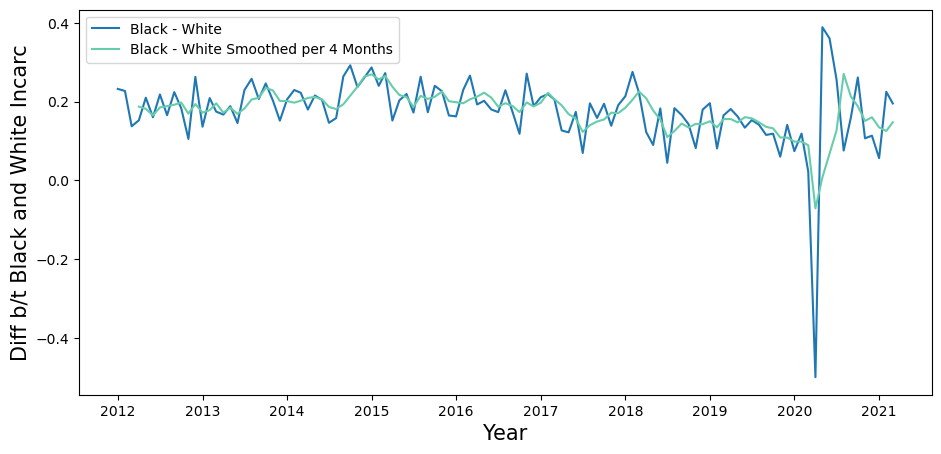

In [35]:
# Visualize:

plt.figure(figsize=(11,5))
plt.plot(df_incarc.sentenceym_derived, df_incarc.racial_difference, label = 'Black - White')

# For smoothed line 
df_incarc["racial_diff_smoothed"] = df_incarc["racial_difference"].rolling(window=4).mean()
df
plt.plot(df_incarc.sentenceym_derived, df_incarc.racial_diff_smoothed, label = 'Black - White Smoothed per 4 Months', color = "mediumaquamarine")

plt.legend()
plt.xlabel("Year", fontsize=15)
plt.ylabel("Diff b/t Black and White Incarc", fontsize=15)

### Observations of trends over time

There seems to have been a slight decrease in incarceration disparities since the beginning of the dataset, with a sharp decrease around 2020 likely due to the pandemic and lowered arrest rates that slightly rebounded.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [39]:
df2_3_b = df2.groupby("simplified_offense_derived").agg({"is_black_derived" : lambda x: x.values.sum()}).reset_index()
df2_3_w = df2.groupby("simplified_offense_derived").agg({"is_white_derived" : lambda x: x.values.sum()}).reset_index()

top_10_black_off = df2_3_b.sort_values(by="is_black_derived", ascending=False)
top_10_black_off = top_10_black_off.reset_index()
t10b = top_10_black_off["simplified_offense_derived"][:10]
#t10b

top_10_white_off = df2_3_w.sort_values(by="is_white_derived", ascending=False)
top_10_white_off = top_10_white_off.reset_index()
t10w = top_10_white_off["simplified_offense_derived"][:10]
#t10w

## finally, concatenate results into one df
frequent_offenses = pd.concat([t10b, t10w]).unique() # Only take unique values for union
frequent_offenses.sort()
print(frequent_offenses)

['Battery' 'Burglary' 'DUI' 'Driving With Suspended Or Revoked License'
 'Narcotics' 'Other Offense' 'Residential Burglary' 'Retail Theft'
 'Robbery' 'Theft' 'UUW - Unlawful Use of Weapon' 'Vehicle-related']


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [41]:
# Create table 

df2["is_incar"] = df2.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"])
df2["is_black_incar"] = df2.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"]) & df2.is_black_derived == True
df2["is_white_incar"] = df2.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"]) & df2.is_white_derived == True

df2_3_2 = df2[df2.simplified_offense_derived.isin(frequent_offenses)].groupby("simplified_offense_derived").agg({"is_incar" : lambda x: x.values.sum(),
                                                 "is_black_incar" : lambda x: x.values.sum(),
                                                "is_black_derived" :  lambda x: x.values.sum(),
                                                "is_white_derived" :  lambda x: x.values.sum(),                                                    
                                                "is_white_incar" : lambda x: x.values.sum()}).reset_index()

df2_3_2["prop_black_incar"] = (df2_3_2.is_black_incar / df2_3_2.is_black_derived)
df2_3_2["prop_white_incar"] = (df2_3_2.is_white_incar / df2_3_2.is_white_derived)
df2_3_2["black_minus_white"] = (df2_3_2.prop_black_incar - df2_3_2.prop_white_incar)

df2_3_2.sort_values(by="black_minus_white", ascending=False).reset_index()
print(df2_3_2)

,index,simplified_offense_derived,is_incar,is_black_incar,is_black_derived,is_white_derived,is_white_incar,prop_black_incar,prop_white_incar,black_minus_white
0,4,Narcotics,18531,15841,29451,4923,1194,0.537876,0.242535,0.295341
1,0,Battery,3257,2367,4650,1448,399,0.509032,0.275552,0.233480
2,10,UUW - Unlawful Use of Weapon,8060,6689,9608,527,254,0.696191,0.481973,0.214217
3,7,Retail Theft,5718,4058,6812,2509,1128,0.595713,0.449582,0.146132
4,1,Burglary,3844,2514,3798,1454,779,0.661927,0.535763,0.126164
5,5,Other Offense,645,423,1242,569,131,0.340580,0.230228,0.110351
6,3,Driving With Suspended Or Revoked License,4186,2596,4459,1160,576,0.582193,0.496552,0.085642
7,9,Theft,1553,1015,2623,1095,349,0.386961,0.318721,0.068240
8,6,Residential Burglary,2554,1638,2282,717,469,0.717791,0.654114,0.063677
9,2,DUI,3702,1556,3842,1995,682,0.404997,0.341855,0.063143


                   simplified_offense_derived  is_incar  is_black_incar  \
0                                     Battery      3257            2367   
1                                    Burglary      3844            2514   
2                                         DUI      3702            1556   
3   Driving With Suspended Or Revoked License      4186            2596   
4                                   Narcotics     18531           15841   
5                               Other Offense       645             423   
6                        Residential Burglary      2554            1638   
7                                Retail Theft      5718            4058   
8                                     Robbery      1926            1527   
9                                       Theft      1553            1015   
10               UUW - Unlawful Use of Weapon      8060            6689   
11                            Vehicle-related      1805            1329   

    is_black_derived  is

### Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?

Sorting by the offenses with the greatest disparity between the rate of incarceration of Black defendants versus White defendants, we see that the offenses that show the largest disparities in judges being less likely to sentence White defendants to incarceration are, in decreasing order, narcotics, battery, and UUW (unlawful use of weapon) which are all above a 20% disparity.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


,index,Bandwidth,Before,After,NumCases_Before,NumCases_After,Gap
0,0,Two months,0.087912,0.154949,267,285,0.067037
1,1,Four months,0.081588,0.081615,586,441,0.000027
2,2,Eight months,0.132900,0.043450,1125,707,-0.089450
3,3,Twelve months,0.161618,0.064705,1656,855,-0.096914


,index,Bandwidth,Before,After,NumCases_Before,NumCases_After,Gap,StdErrBefore,StdErrAfter
0,0,Two months,0.087912,0.154949,267,285,0.067037,0.017330,0.021435
1,1,Four months,0.081588,0.081615,586,441,0.000027,0.011308,0.013037
2,2,Eight months,0.132900,0.043450,1125,707,-0.089450,0.010121,0.007667
3,3,Twelve months,0.161618,0.064705,1656,855,-0.096914,0.009046,0.008413


<Figure size 1000x700 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x168d38ad0>,
 [Text(0.125, 0, 'Two months'),
  Text(1.125, 0, 'Four months'),
  Text(2.125, 0, 'Eight months'),
  Text(3.125, 0, 'Twelve months')])

(0.0, 0.18)

Text(0.5, 0, 'Bandwidth')

Text(0, 0.5, 'Gap in Black - White Rates of Incarceration')

Text(0.5, 1.0, 'Black-White Disparities Pre and Post Change to Changing Threshold for Retail Theft')

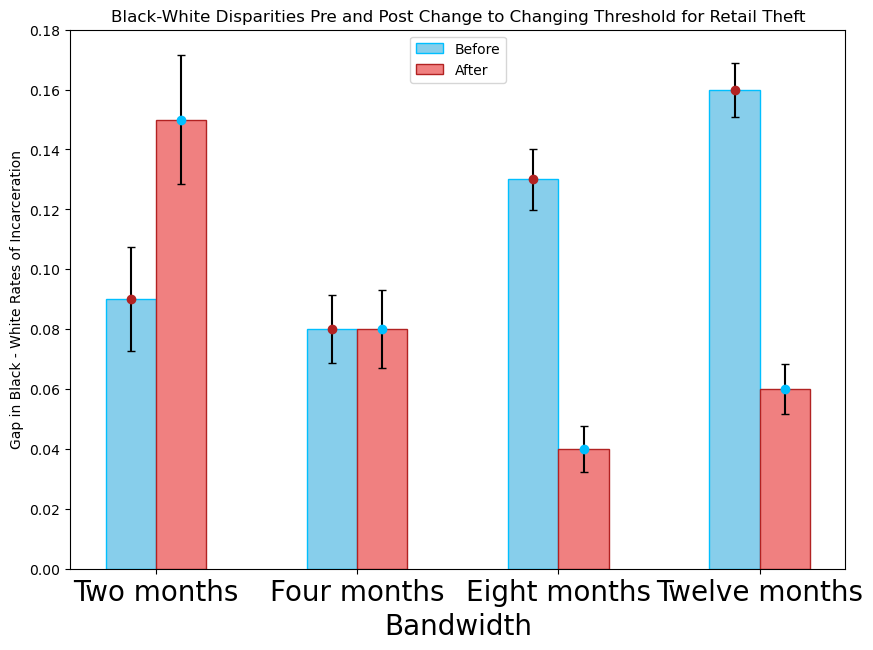

In [44]:
#Basic function, assume band is in months
def retail(band):
    ret_theft = df2[(df2.simplified_offense_derived == "Retail Theft")] 

    trans = pd.Timestamp("2016-12-01 00:00:00")

    rt_b = ret_theft[(ret_theft.sentenceym_derived >= trans + pd.DateOffset(months=-band)) & (ret_theft.sentenceym_derived <= trans + pd.DateOffset(months=-1))] 
    rt_a = ret_theft[(ret_theft.sentenceym_derived <= trans + pd.DateOffset(months=band)) & (ret_theft.sentenceym_derived >= trans + pd.DateOffset(months=1))] 

    before = get_data(rt_b)
    after = get_data(rt_a)
    both = pd.concat([before, after]).reset_index()

    return both

# Helper function 
def get_data(rt_b):
    rt_b = rt_b.copy() # Crucial to stop yielding warnings
    
    rt_b["is_incar_b"] = rt_b.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"])
    rt_b["is_black_incar_b"] = rt_b.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"]) & rt_b.is_black_derived == True
    rt_b["is_white_incar_b"] = rt_b.COMMITMENT_TYPE.isin(["Illinois Department of Corrections"]) & rt_b.is_white_derived == True

    rt3_b = rt_b.groupby(lambda x: True).agg({
                        "is_black_incar_b" : lambda x: x.values.sum(),
                        "is_white_incar_b" : lambda x: x.values.sum(),
                        "is_black_derived" : lambda x: x.values.sum(),
                        "is_white_derived" : lambda x: x.values.sum(),
                        "CASE_ID" : lambda x: x.nunique() }).reset_index()
    
    rt3_b["prop_black_incar"] = (rt3_b.is_black_incar_b / rt3_b.is_black_derived)
    rt3_b["prop_white_incar"] = (rt3_b.is_white_incar_b / rt3_b.is_white_derived)
    rt3_b["black_minus_white"] = (rt3_b.prop_black_incar - rt3_b.prop_white_incar)

    #return rt2_b
    return rt3_b

# Creating a dataframe, using the 2 4 8 12-month bandwidths
b2 = retail(2)
b4 = retail(4)
b8 = retail(8)
b12 = retail(12)

data = [["Two months", b2.black_minus_white[0], b2.black_minus_white[1], b2.CASE_ID[0], b2.CASE_ID[1]],
       ["Four months", b4.black_minus_white[0], b4.black_minus_white[1], b4.CASE_ID[0], b4.CASE_ID[1]],
       ["Eight months", b8.black_minus_white[0], b8.black_minus_white[1], b8.CASE_ID[0], b8.CASE_ID[1]],
       ["Twelve months", b12.black_minus_white[0], b12.black_minus_white[1], b12.CASE_ID[0], b12.CASE_ID[1]]]

# Tabular results
df3 = pd.DataFrame(data, columns=["Bandwidth", "Before", "After", "NumCases_Before", "NumCases_After"]).reset_index()
df3["Gap"] = df3.After - df3.Before  
df3

# Extra credit 
def stdErr(p, n):
    res = ( (p * (1 - p)) / n ) ** 0.5
    return res

df3["StdErrBefore"] = stdErr(df3.Before, df3.NumCases_Before)
df3["StdErrAfter"] = stdErr(df3.After, df3.NumCases_After)
df3

# Visualization:

plt.figure(figsize=(10,7)) # Define the size of the graph

n=4
r = np.arange(n) 
width = 0.25

plt.bar(r, round(df3.Before, 2), label = "Before", 
        color="skyblue",
       edgecolor = "deepskyblue",
       width = width) 

plt.bar(r + width, round(df3.After, 2), label = "After", 
        color="lightcoral",
       edgecolor = "firebrick",
       width = width) 

# Extra Credit
plt.errorbar(r, round(df3.Before, 2), yerr=df3.StdErrBefore, capsize=3, fmt="o", ecolor = "black", color = "firebrick")
plt.errorbar(r + width, round(df3.After, 2), yerr=df3.StdErrAfter, capsize=3, fmt="o", ecolor = "black", color = "deepskyblue")

plt.legend(loc=9)
plt.xticks(r + width/2, df3.Bandwidth, fontsize=20)
plt.ylim(0, 0.18)

plt.xlabel("Bandwidth", fontsize=20)
plt.ylabel("Gap in Black - White Rates of Incarceration")
plt.title("Black-White Disparities Pre and Post Change to Changing Threshold for Retail Theft")


### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

## Results 

The results show that there was a general decrease in Black-White disparities after the change in criminal justice policy in December of 2016, with disparities reducing further over a longer bandwidth of time. The general decreasing trends over time provide justification for those who  argued that the retail theft policy change would narrow disparities, although those on the other side could point to the slight increase in incarceration rate even after the policy was implemented after two months and the equal rates with a bandwidth of four months, suggesting that the narrowed disparities do not perform well in the short-term and may possibly reduce further after twelve months, as well.